<center>
<b><font size=6>Industry 4.0 의 중심, BigData</font></b>
</center>

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# WordCloud

In [1]:
from konlpy import utils

In [ ]:
utils.replace_set

In [2]:
! pip install pytagcloud

  Running setup.py bdist_wheel for pytagcloud: started
  Running setup.py bdist_wheel for pytagcloud: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\08\bf\d4\8899fd82d7f62af5960d17cc59b80edae474380b92828c8c1f
Successfully built pytagcloud


In [4]:
! pip install pygame

In [6]:
! pip install simplejson

  Running setup.py bdist_wheel for simplejson: started
  Running setup.py bdist_wheel for simplejson: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\5d\1a\1e\0350bb3df3e74215cd91325344cc86c2c691f5306eb4d22c77
Successfully built simplejson


In [7]:
from konlpy.tag import Hannanum
from lxml import html
from collections import Counter
from urllib.request import urlopen
from IPython.display import Image

import sys
import random
import webbrowser
import pytagcloud      # requires Korean font support

In [8]:
rndno = lambda: random.randint(0, 255)
color = lambda: (rndno(), rndno(), rndno())

In [9]:
color()

(250, 167, 209)

In [10]:
def get_bill_text(billnum):
    url = 'http://pokr.kr/bill/{num}/text'.format(num=billnum)
    response = urlopen(url).read().decode('utf-8')
    page = html.fromstring(response)
    text = page.xpath(".//div[@id='bill-sections']/pre/text()")[0]
    
    return text

In [11]:
def get_tags(text, ntags=50, multiplier=10):
    hannanum = Hannanum()
    nouns = hannanum.nouns(text)
    count = Counter(nouns)
    return [
        {'color' : color(),
         'tag' : n,
         'size' : c*multiplier,
        }
        for n, c in count.most_common(ntags)
    ]

In [12]:
def draw_cloud(tags, filename, fontname='Korean', size=(800, 600)):
    pytagcloud.create_tag_image(tags, filename, fontname=fontname, size=size)
    webbrowser.open(filename)

In [13]:
# 동물보호법 일부개정법률안 번호
bill_num = '1904882'
text = get_bill_text(bill_num)
print(text)


             동물보호법 일부개정법률안
              (윤명희의원 대표발의)




의 안               발의연월일 : 2013.   5. 8.
      4882
번 호               발   의   자 : 윤명희ㆍ김영록ㆍ이만우
                             김현숙ㆍ조명철ㆍ송영근
                             정희수ㆍ박인숙ㆍ김승남
                             이에리사 의원(10인)




제안이유 및 주요내용

 현행법은 동물복지를 도모하고 동물에 대한 학대 행위를 방지하기

위하여 제정되었으나, 학대에 대한 개념이 불명확하여 이에 대한 개선

요구가 점점 높아지고 있음.

 또한, 인터넷 등 정보통신망을 이용하여 동물을 학대하는 영상물이

확산되고 있는 추세에 있지만, 현행법에는 이를 금지하고 제재할 수

있는 법적 수단은 마련되어 있지 않음.

 동물보호를 위해서는 동물에 대한 학대행위 뿐만 아니라 학대행위

를 촬영한 영상물을 판매·전시·전달·상영 또는 인터넷에 게재하는 행

위도 제한할 필요가 있음. 이에 동물을 학대하는 장면을 촬영한 영상

물을 유포한 자에 대하여 과태료를 부과할 수 있도록 하려는 것임(안


                  - 1 -
                    - 2 -


제8조제5항 신설, 제47조제1항1호의2 신설).
법률 제      호




           동물보호법 일부개정법률안




동물보호법 일부를 다음과 같이 개정한다.

제8조 제1항 각 호 외의 부분 중 “누구든지”를 ““동물학대”라 함은 동

물을 대상으로 정당한 사유 없이 불필요하고 피할 수 있는 신체적 고

통을 주거나 굶주림, 질병 등에 방치해서 고통을 주는 일체의 행위 및

동물이 그러한 고통을 겪고 있을 때 적절한 조치를 태만히 하는 행위

를 말하며, 누구든지”로 한다.

제8조에 제5항을 다음과 같이 신설한다.

 ⑤ 누구든지

In [14]:
tags = get_tags(text)
tags

[{'color': (94, 172, 122), 'tag': '동물', 'size': 80},
 {'color': (222, 213, 74), 'tag': '행위', 'size': 80},
 {'color': (158, 141, 179), 'tag': '인터넷', 'size': 60},
 {'color': (62, 199, 119), 'tag': '촬영', 'size': 60},
 {'color': (99, 48, 99), 'tag': '등', 'size': 50},
 {'color': (166, 33, 129), 'tag': '영상물', 'size': 50},
 {'color': (214, 113, 177), 'tag': '다음', 'size': 50},
 {'color': (218, 180, 159), 'tag': '호', 'size': 40},
 {'color': (227, 252, 179), 'tag': '학대', 'size': 40},
 {'color': (154, 246, 185), 'tag': '수', 'size': 40},
 {'color': (114, 96, 83), 'tag': '게재', 'size': 40},
 {'color': (76, 33, 42), 'tag': '신설', 'size': 40},
 {'color': (71, 167, 194), 'tag': '고통', 'size': 40},
 {'color': (16, 62, 200), 'tag': '①', 'size': 40},
 {'color': (135, 82, 106), 'tag': '∼', 'size': 40},
 {'color': (5, 200, 232), 'tag': '생', 'size': 40},
 {'color': (165, 126, 107), 'tag': '략', 'size': 40},
 {'color': (77, 210, 242), 'tag': '현행', 'size': 40},
 {'color': (68, 66, 232), 'tag': '동물보호법', 'size': 30

In [15]:
# draw_cloud(tags, 'wordcloud/동물보호법.png')
draw_cloud(tags, 'wordcloud/animal_law.png')

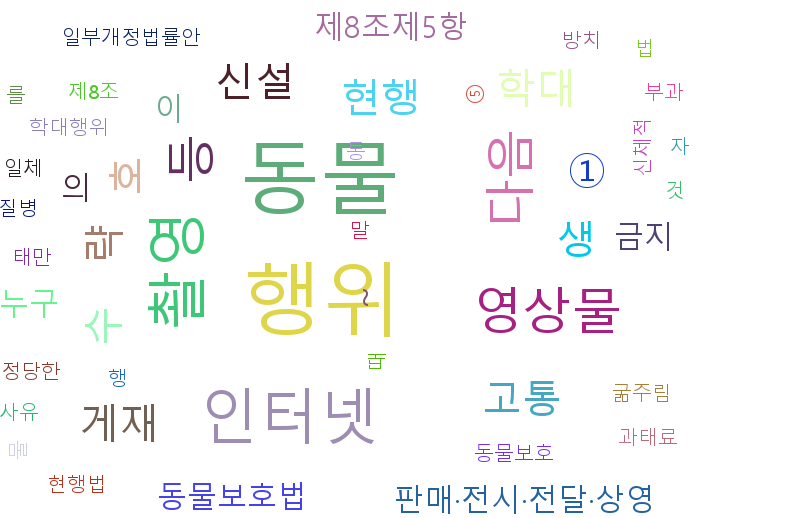

In [16]:
Image('wordcloud/animal_law.png')

In [17]:
from collections import Counter
from konlpy.corpus import kolaw
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.utils import concordance, pprint
from matplotlib import pyplot as plt

In [18]:
kkma = Kkma()
hannanum = Hannanum()

In [19]:
def draw_zipf(count_list, filename, color='blue', marker='o'):
    sorted_list = sorted(count_list, reverse=True)
    plt.plot(sorted_list, color=color, marker=marker)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid()
    plt.savefig(filename)
    webbrowser.open(filename)

In [20]:
text = kolaw.open('constitution.txt').read()
print(text)

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.
  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.
  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.
②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.
  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.
②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.
  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.
②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.
  제8조 ① 정당의 설립은 자유이며, 복수정당제

In [21]:
text_pos = hannanum.pos(text)
text_pos

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J'),
 ('건립', 'N'),
 ('되', 'X'),
 ('ㄴ', 'E'),
 ('대한민국임시정부', 'N'),
 ('의', 'J'),
 ('법통', 'N'),
 ('과', 'J'),
 ('불의', 'N'),
 ('에', 'J'),
 ('항거', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('4·19민주이념', 'N'),
 ('을', 'J'),
 ('계승', 'N'),
 ('하고', 'J'),
 (',', 'S'),
 ('조국', 'N'),
 ('의', 'J'),
 ('민주개혁', 'N'),
 ('과', 'J'),
 ('평화적', 'N'),
 ('통일', 'N'),
 ('의', 'J'),
 ('사명', 'N'),
 ('에', 'J'),
 ('입각', 'N'),
 ('하', 'X'),
 ('어', 'E'),
 ('정의·인도', 'N'),
 ('와', 'J'),
 ('동포애', 'N'),
 ('로써', 'J'),
 ('민족', 'N'),
 ('의', 'J'),
 ('단결', 'N'),
 ('을', 'J'),
 ('공고히', 'M'),
 ('하', 'P'),
 ('고', 'E'),
 (',', 'S'),
 ('모든', 'M'),
 ('사회적', 'N'),
 ('폐습', 'N'),
 ('과', 'J'),
 ('불의', 'N'),
 ('를', 'J'),
 ('타파', 'N'),
 ('하', 'X'),
 ('며', 'E'),
 (',', 'S'),
 ('자율', 'N'),
 ('과', 'J'),
 ('조화', 'N'),
 ('를', 'J'),
 ('바탕', 'N'),
 ('으로', 'J

In [22]:
text_pos_cnt = Counter(text_pos)
text_pos_cnt

Counter({('대한민국헌법', 'N'): 1,
         ('유구', 'N'): 1,
         ('하', 'X'): 291,
         ('ㄴ', 'E'): 223,
         ('역사', 'N'): 1,
         ('와', 'J'): 39,
         ('전통', 'N'): 1,
         ('에', 'J'): 283,
         ('빛', 'N'): 1,
         ('나는', 'J'): 1,
         ('우리', 'N'): 1,
         ('대한국민', 'N'): 1,
         ('은', 'J'): 184,
         ('3·1운동', 'N'): 1,
         ('으로', 'J'): 52,
         ('건립', 'N'): 1,
         ('되', 'X'): 94,
         ('대한민국임시정부', 'N'): 1,
         ('의', 'J'): 396,
         ('법통', 'N'): 1,
         ('과', 'J'): 86,
         ('불의', 'N'): 2,
         ('항거', 'N'): 1,
         ('4·19민주이념', 'N'): 1,
         ('을', 'J'): 211,
         ('계승', 'N'): 1,
         ('하고', 'J'): 20,
         (',', 'S'): 99,
         ('조국', 'N'): 3,
         ('민주개혁', 'N'): 1,
         ('평화적', 'N'): 4,
         ('통일', 'N'): 4,
         ('사명', 'N'): 2,
         ('입각', 'N'): 2,
         ('어', 'E'): 176,
         ('정의·인도', 'N'): 1,
         ('동포애', 'N'): 1,
         ('로써', 'J'): 5,
         ('민족'

In [23]:
print('nchars  :', len(text))
print('ntoknes :', len(text.split()))
print('nmorphs :', len(set(text_pos)))

nchars  : 18884
ntoknes : 4178
nmorphs : 1499


In [24]:
# Top 20 frequent morphemses
# pprint(text_pos_cnt.most_common(20))
text_pos_cnt.most_common(20)

[(('의', 'J'), 396),
 (('.', 'S'), 340),
 (('하', 'X'), 291),
 (('에', 'J'), 283),
 (('ㄴ다', 'E'), 241),
 (('ㄴ', 'E'), 223),
 (('이', 'J'), 221),
 (('을', 'J'), 211),
 (('은', 'J'), 184),
 (('어', 'E'), 176),
 (('를', 'J'), 148),
 (('ㄹ', 'E'), 134),
 (('하', 'P'), 124),
 (('는', 'J'), 117),
 (('법률', 'N'), 115),
 ((',', 'S'), 99),
 (('는', 'E'), 97),
 (('있', 'P'), 96),
 (('되', 'X'), 94),
 (('수', 'N'), 91)]

In [25]:
# Location of "대한민국" in the document
concordance(u'대한민국', text, show=True)

0	대한민국헌법 유구한 역사와
9	대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에
98	총강 제1조 ① 대한민국은 민주공화국이다. ②대한민국의
100	① 대한민국은 민주공화국이다. ②대한민국의 주권은 국민에게
110	나온다. 제2조 ① 대한민국의 국민이 되는
126	의무를 진다. 제3조 대한민국의 영토는 한반도와
133	부속도서로 한다. 제4조 대한민국은 통일을 지향하며,
147	추진한다. 제5조 ① 대한민국은 국제평화의 유지에
787	군무원이 아닌 국민은 대한민국의 영역안에서는 중대한
1836	파견 또는 외국군대의 대한민국 영역안에서의 주류에
3620	경제 제119조 ① 대한민국의 경제질서는 개인과


[0, 9, 98, 100, 110, 126, 133, 147, 787, 1836, 3620]

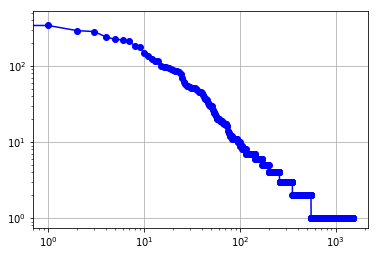

In [26]:
draw_zipf(text_pos_cnt.values(), 'wordcloud/zipf.png')

In [29]:
last_message = '''
안녕하세요!
오늘이 마지막 수업이군요.
짧은 과정이었지만 파이썬이라는 프로그램언어를 통해 데이터분석 입문의 디딤돌이 되고자 노력했습니다.
노력은 절대 배신하지 않는다는 말을 믿습니다.
언제 어디서 무슨일을 하던지 항상 응원하겠습니다.
그동안 수고 많으셨습니다.
'''

In [30]:
kkma.nouns(last_message)

['안녕',
 '오늘',
 '마지막',
 '수업',
 '과정',
 '파이',
 '이',
 '프로그램',
 '프로그램언어',
 '언어',
 '데이터',
 '데이터분석',
 '분석',
 '입문',
 '디딤돌',
 '노력',
 '배신',
 '말',
 '어디',
 '일',
 '응원',
 '그동안',
 '수고']

In [31]:
kkma.pos(last_message)

[('안녕', 'NNG'),
 ('하', 'XSV'),
 ('세요', 'EFN'),
 ('!', 'SF'),
 ('오늘', 'NNG'),
 ('이', 'JKS'),
 ('마지막', 'NNG'),
 ('수업', 'NNG'),
 ('이', 'VCP'),
 ('군요', 'EFI'),
 ('.', 'SF'),
 ('짧', 'VA'),
 ('은', 'ETD'),
 ('과정', 'NNG'),
 ('이', 'VCP'),
 ('었', 'EPT'),
 ('지만', 'ECE'),
 ('파이', 'NNG'),
 ('썰', 'VV'),
 ('ㄴ', 'ETD'),
 ('이', 'NNG'),
 ('이', 'VCP'),
 ('라는', 'ETD'),
 ('프로그램', 'NNG'),
 ('언어', 'NNG'),
 ('를', 'JKO'),
 ('통하', 'VV'),
 ('어', 'ECS'),
 ('데이터', 'NNG'),
 ('분석', 'NNG'),
 ('입문', 'NNG'),
 ('의', 'JKG'),
 ('디딤돌', 'NNG'),
 ('이', 'JKC'),
 ('되', 'VV'),
 ('고자', 'ECD'),
 ('노력', 'NNG'),
 ('하', 'XSV'),
 ('었', 'EPT'),
 ('습니다', 'EFN'),
 ('.', 'SF'),
 ('노력', 'NNG'),
 ('은', 'JX'),
 ('절대', 'MAG'),
 ('배신', 'NNG'),
 ('하', 'XSV'),
 ('지', 'ECD'),
 ('않', 'VXV'),
 ('는다는', 'ETD'),
 ('말', 'NNG'),
 ('을', 'JKO'),
 ('믿', 'VV'),
 ('습니다', 'EFN'),
 ('.', 'SF'),
 ('언제', 'MAG'),
 ('어디', 'NP'),
 ('서', 'JKM'),
 ('무슨', 'MDT'),
 ('일', 'NNG'),
 ('을', 'JKO'),
 ('하', 'VV'),
 ('던지', 'ECD'),
 ('항상', 'MAG'),
 ('응원', 'NNG'),
 ('하', 'XSV')

In [32]:
kkma.sentences(last_message)

['안녕하세요!',
 '오늘이 마지막 수업이군요.',
 '짧은 과정이었지만 파이 썬 이라는 프로그램 언어를 통해 데이터 분석 입문의 디딤돌이 되고자 노력했습니다.',
 '노력은 절대 배신하지 않는다는 말을 믿습니다.',
 '언제 어디서 무슨 일을 하던지 항상 응원하겠습니다.',
 '그동안 수고 많으셨습니다.']

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>